In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/drive/MyDrive/Boston House Price/housing.csv', delimiter='\s+', header=None, names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# statistical info
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# check for null values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

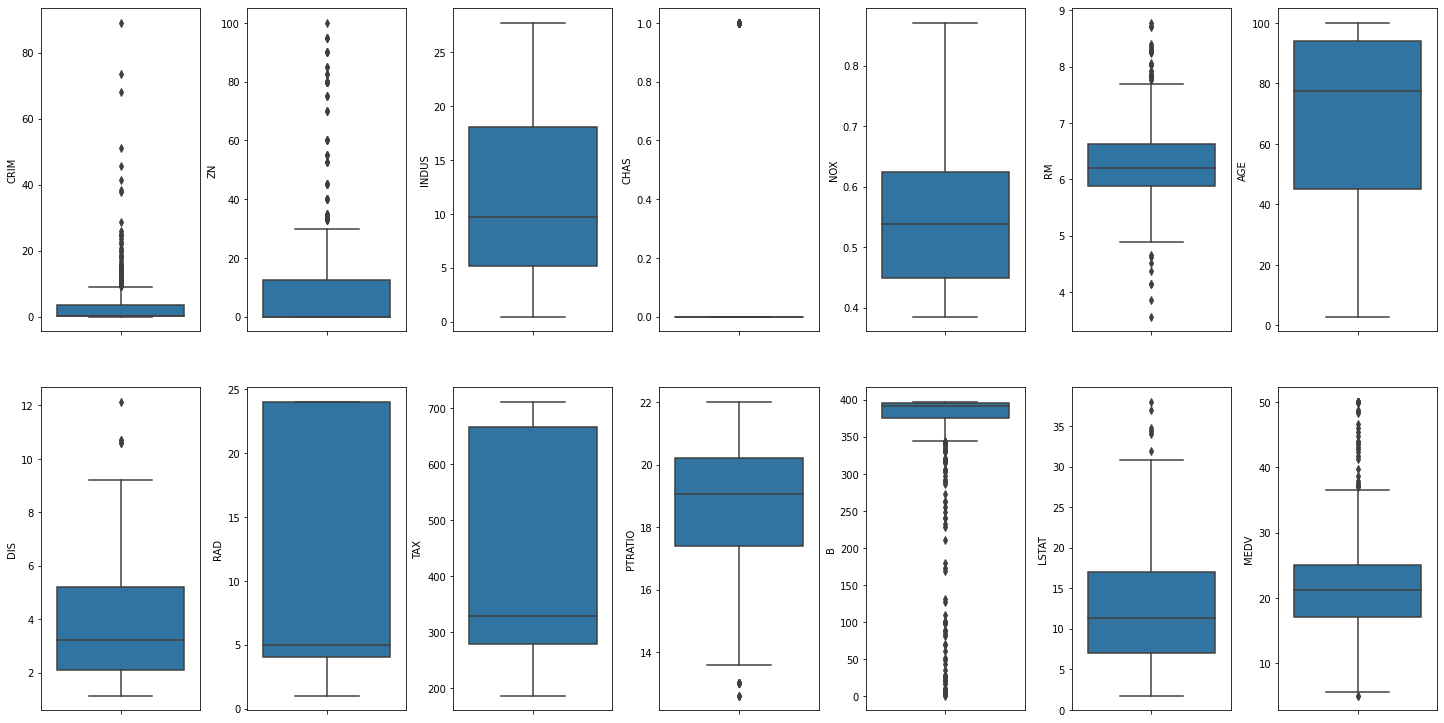

In [ ]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.boxplot(y=col, data=data, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

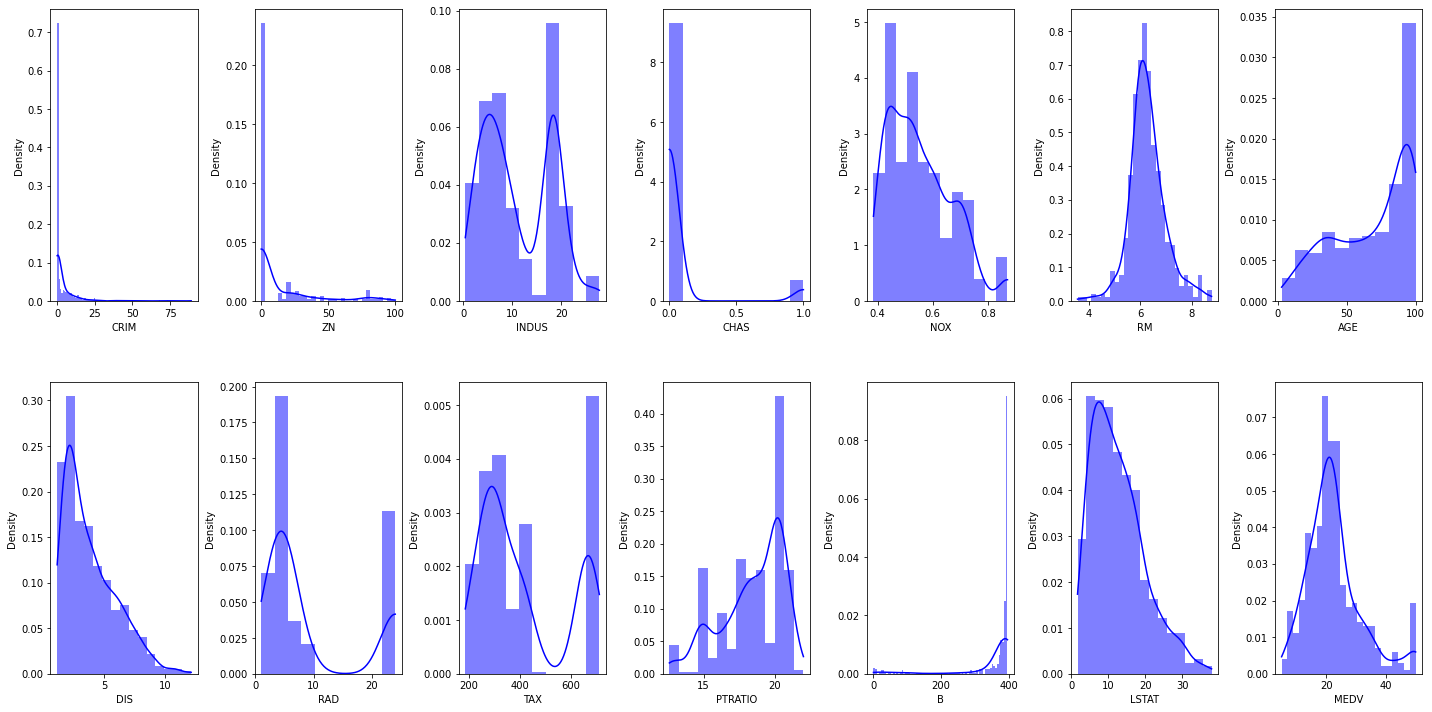

In [ ]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.histplot(value, ax=ax[index], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
    index += 1
plt.tight_layout(w_pad=0.7, h_pad=5.0)

In [ ]:
#Features with gaussian distribution

#for feature in data.loc[:, data.columns != 'CHAS']:
 # upper_limit = data[feature].mean() + 3*data[feature].std()
  #lower_limit = data[feature].mean() - 3*data[feature].std()
  #print('The uppper limit value of {} is {}'.format(feature,upper_limit))
  #print('The lower limit value of {} is {}'.format(feature,lower_limit))
  #print()

In [ ]:
#Define a function to determine outlier boundaries
#def gaussian_outlier_limits(feature):
 # upper_limit = data[feature].mean() + 3*data[feature].std()
  #lower_limit = data[feature].mean() - 3*data[feature].std()
  #return upper_limit,lower_limit

In [ ]:
#for feature in data.loc[:, data.columns != 'CHAS']:
  #print(gaussian_outlier_limits(feature))

In [ ]:
# Calculating the Zscore
df = data.copy()
df['RM_zscore'] = (df['RM'] - df['RM'].mean())/df['RM'].std()

print(df['RM_zscore'].max())
print(df['RM_zscore'].min())
df[['RM','RM_zscore']].head()

3.5515296431831844
-3.8764132257186055


,RM,RM_zscore
0,6.575,0.413263
1,6.421,0.194082
2,7.185,1.281446
3,6.998,1.015298
4,7.147,1.227362


In [ ]:
upper_limit = data['RM'].mean() + 2.3*data['RM'].std()
lower_limit = data['RM'].mean() - 2.3*data['RM'].std()

In [ ]:
print(lower_limit)
print(upper_limit)

4.668614957496542
7.900653817207031


In [ ]:
data['RM'] = np.where(data['RM']>upper_limit,
                    upper_limit,
                    np.where( data['RM']<lower_limit,
                    lower_limit,
                    data['RM']))

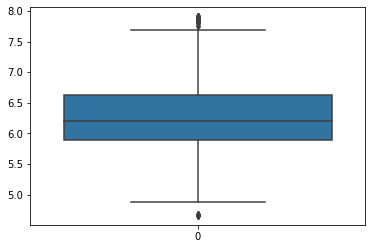

In [ ]:
sns.boxplot(data = data['RM'])

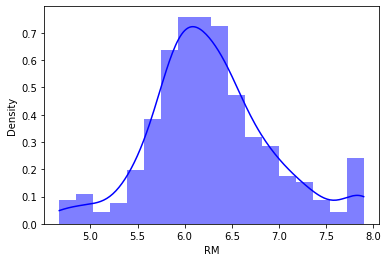

In [ ]:
sns.histplot(data['RM'], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)

In [ ]:
# Finding the IQR
percentile25 = data['LSTAT'].quantile(0.25)
percentile75 = data['LSTAT'].quantile(0.75)
  
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1 * iqr
lower_limit = percentile25 - 1 * iqr

data['LSTAT'] = np.where(data['LSTAT'] > upper_limit,
                        upper_limit,
                        np.where(data['LSTAT'] < lower_limit,
                        lower_limit,
                        data['LSTAT']))

In [ ]:
upper_limit

26.960000000000004

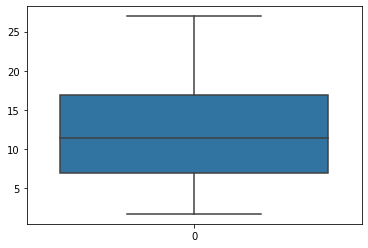

In [ ]:
sns.boxplot(data = data['LSTAT'])

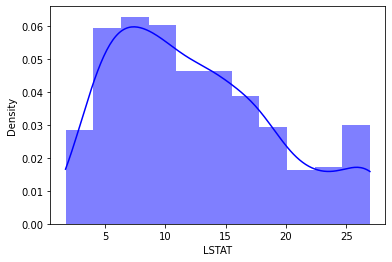

In [ ]:
sns.histplot(data['LSTAT'], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)

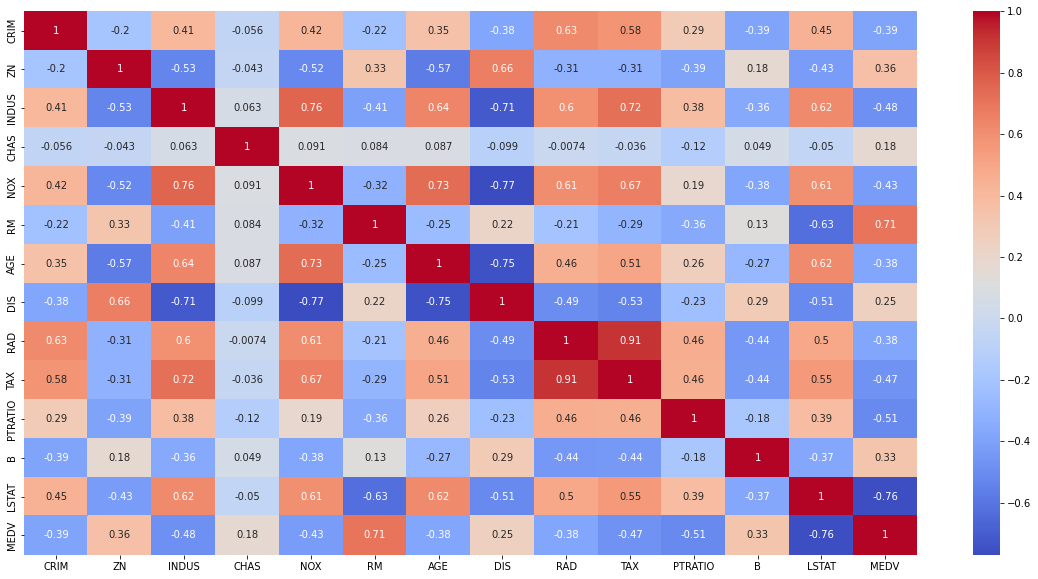

In [ ]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
data.drop('TAX',axis=1,inplace=True)

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2


In [ ]:
x = df.drop(columns=['MEDV'], axis=1)
y = df['MEDV']

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f'Rows in train set: {len(x_train)}\nRows in test set: {len(x_test)}')

Rows in train set: 404
Rows in test set: 102


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#Fitting Simple Linear Regression int the Tranning Set
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(x_train,y_train)

y_pred = regressor_lr.predict(x_test)
print('MSE value is {}'.format(mean_squared_error(y_test, y_pred)))

MSE value is 24.291119474973566


In [ ]:
from sklearn.svm import SVR
regressor_svr = SVR()
regressor_svr.fit(x_train,y_train)

y_pred = regressor_svr.predict(x_test)
print('MSE value is {}'.format(mean_squared_error(y_test, y_pred)))

MSE value is 24.60119472368776


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_dtr = DecisionTreeRegressor()
regressor_dtr.fit(x_train,y_train)

y_pred = regressor_dtr.predict(x_test)
print('MSE value is {}'.format(mean_squared_error(y_test, y_pred)))

MSE value is 12.260000000000005


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train,y_train)

y_pred = regressor_rf.predict(x_test)
print('MSE value is {}'.format(mean_squared_error(y_test, y_pred)))

MSE value is 8.522433754901956
